In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

# Simulation
+ JSAP version: 547
+ Energy: 2 MeV
+ Geo: 1 t
+ Simulation: (0,z/5,z): z from -0.65 to 0.65 m, step 0.01 m
+ 20k events per point

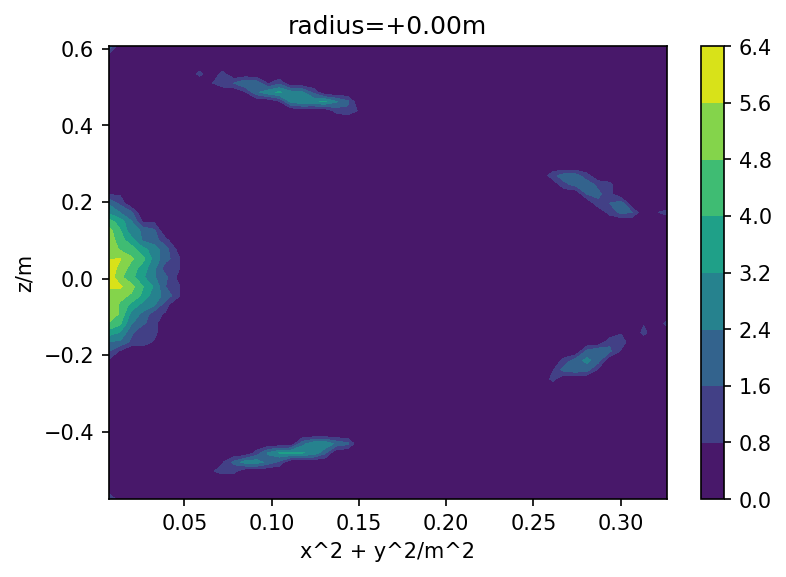

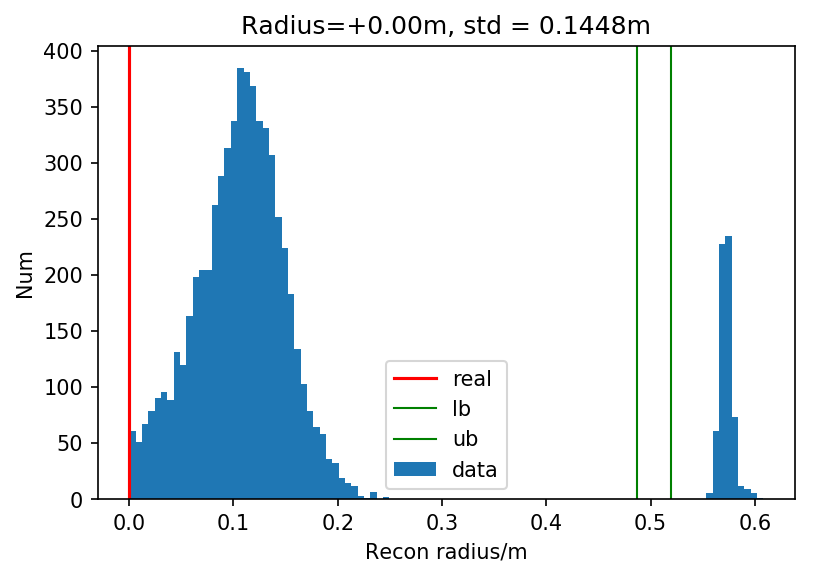

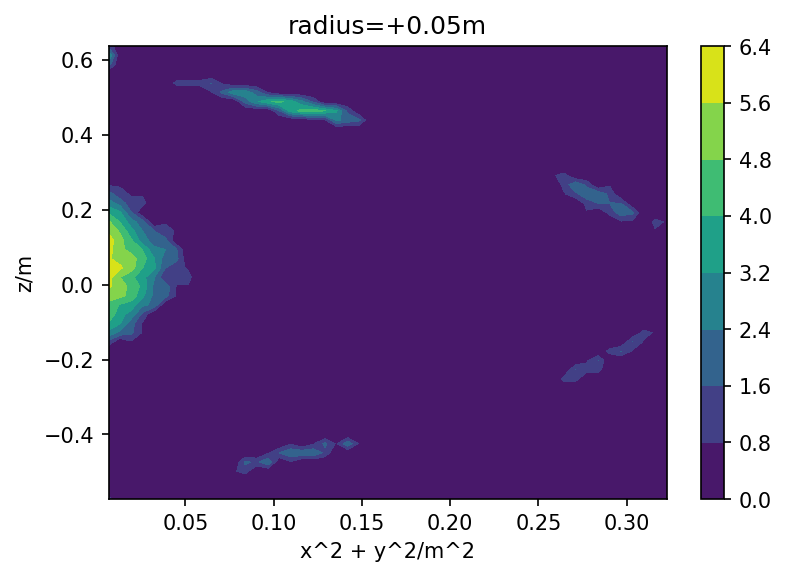

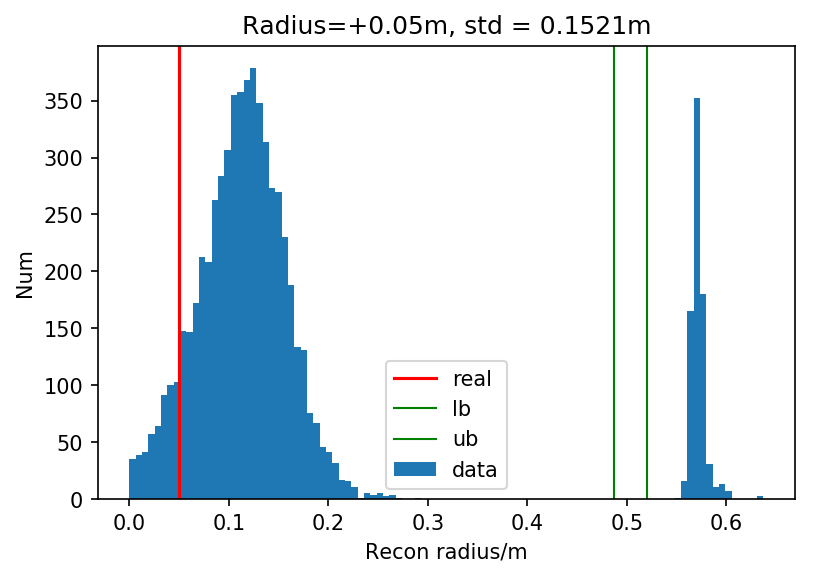

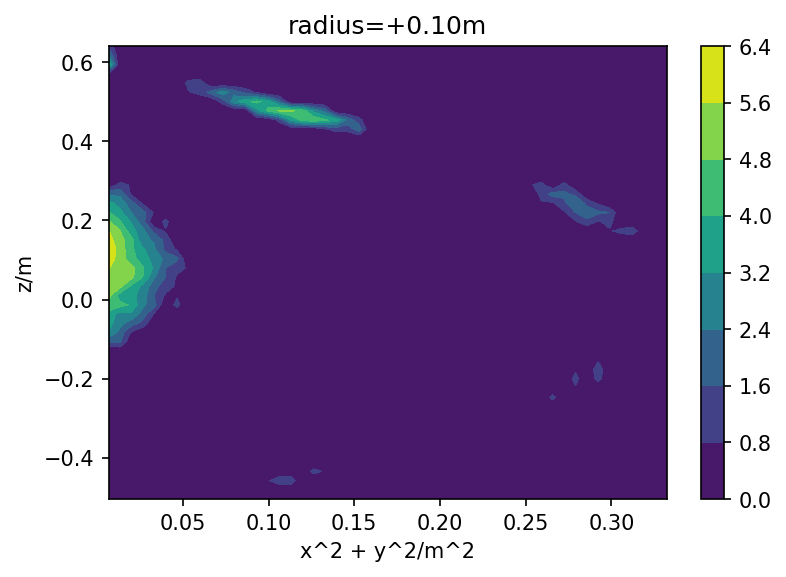

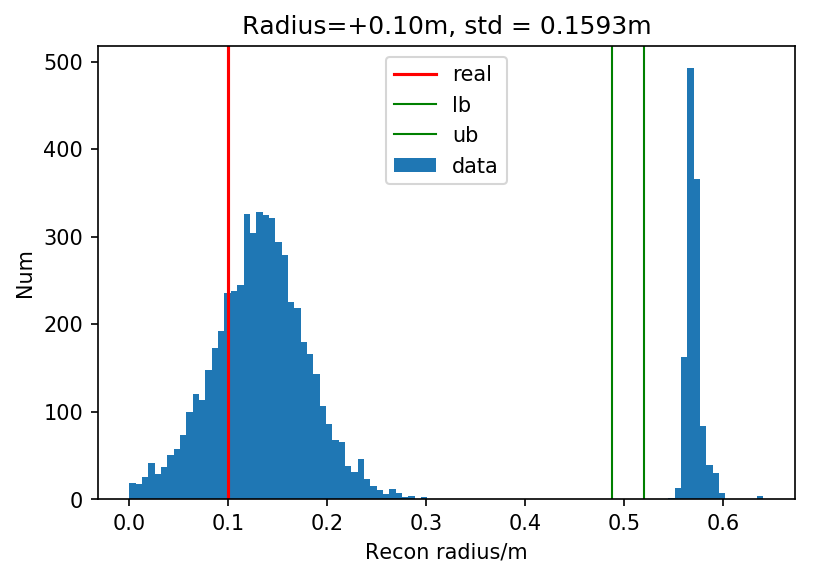

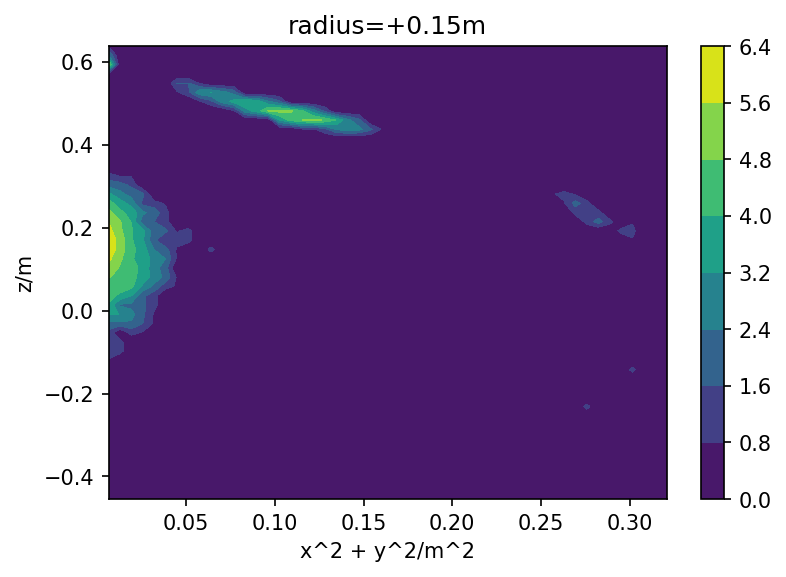

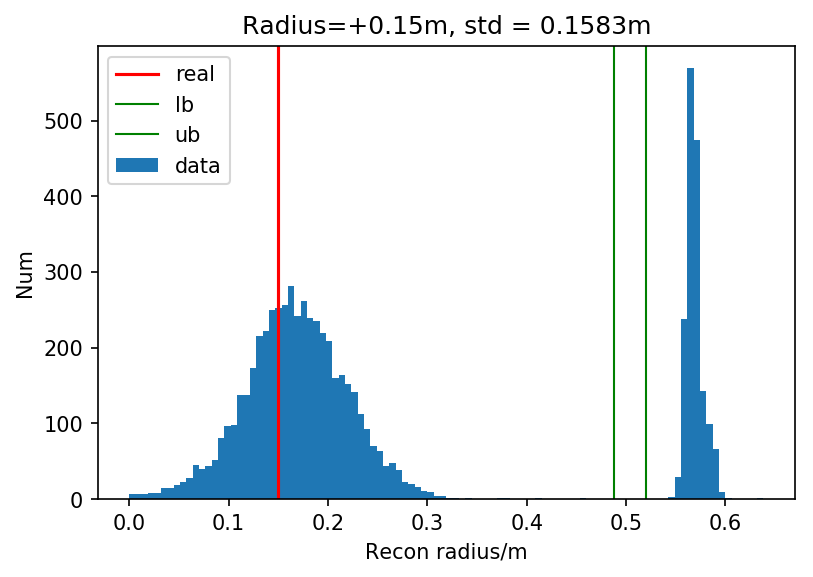

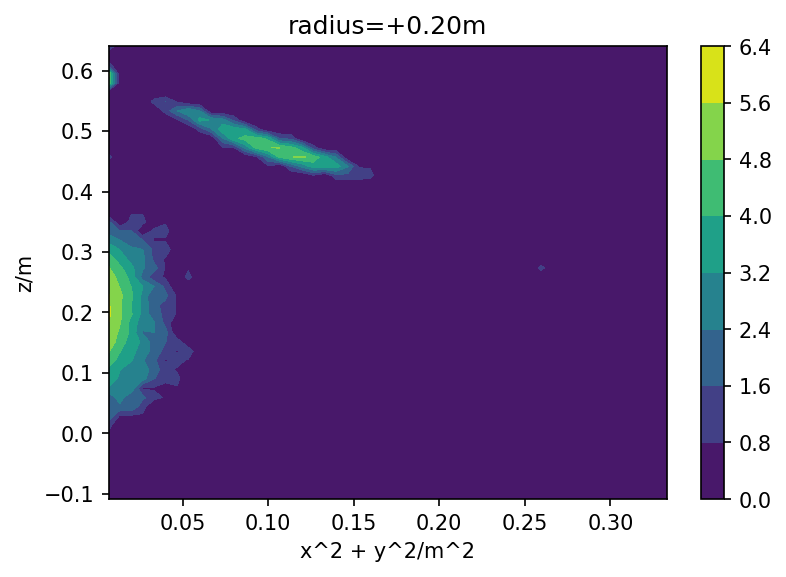

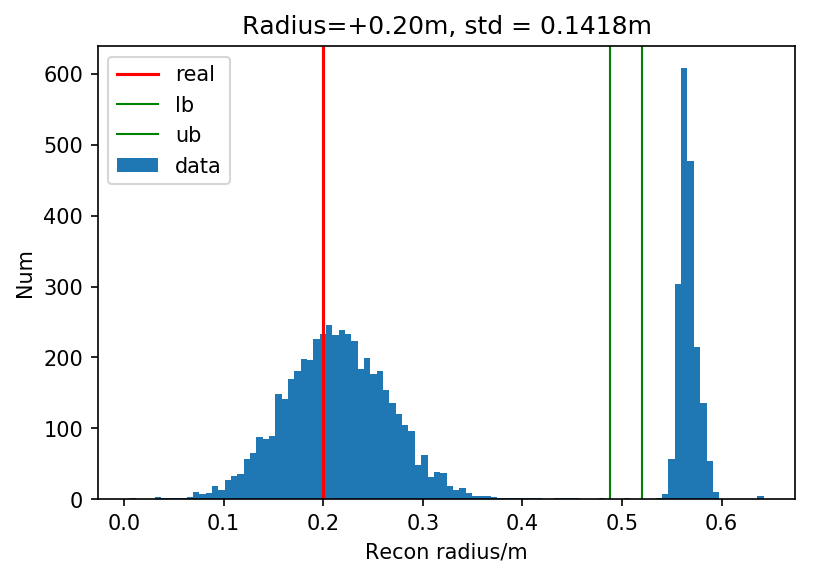

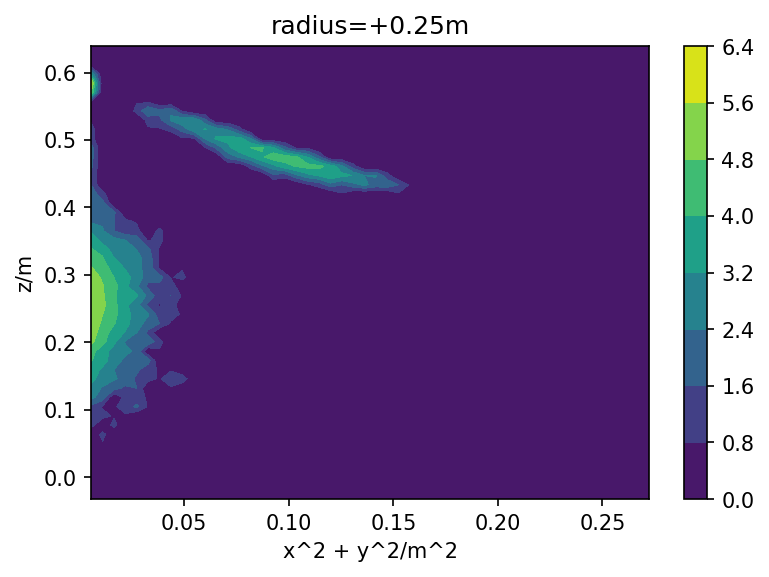

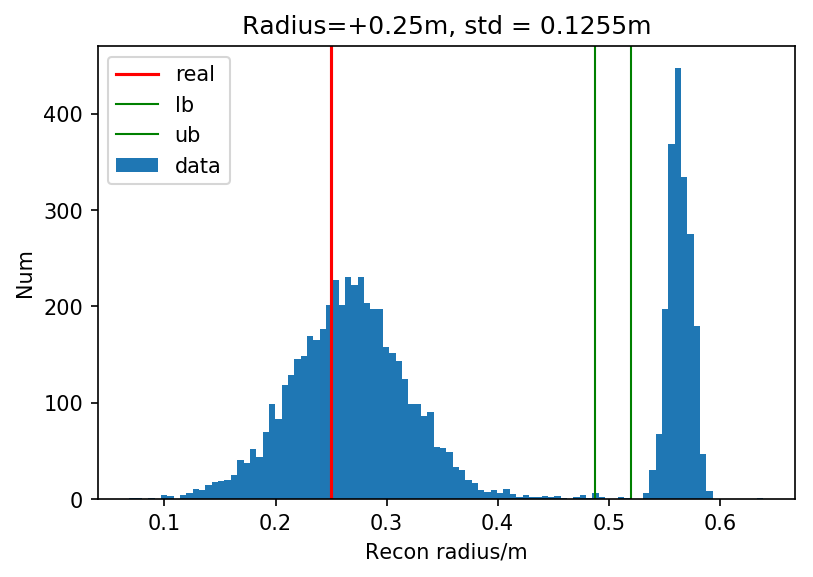

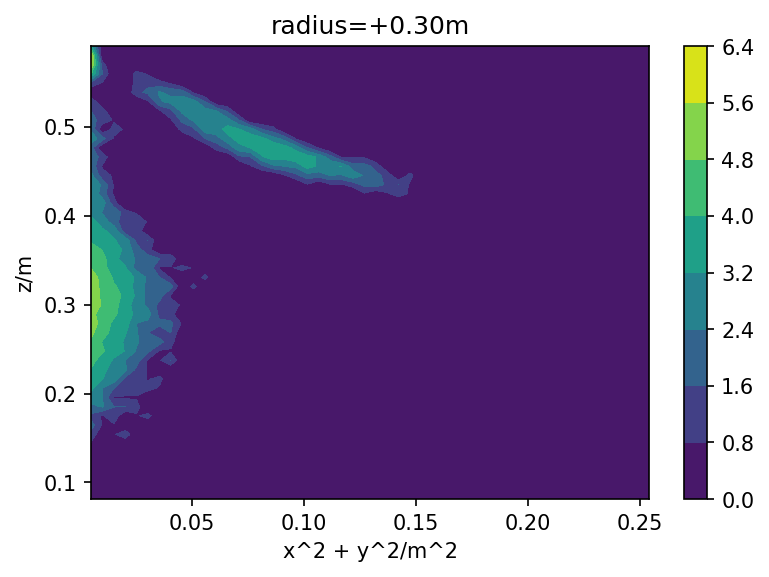

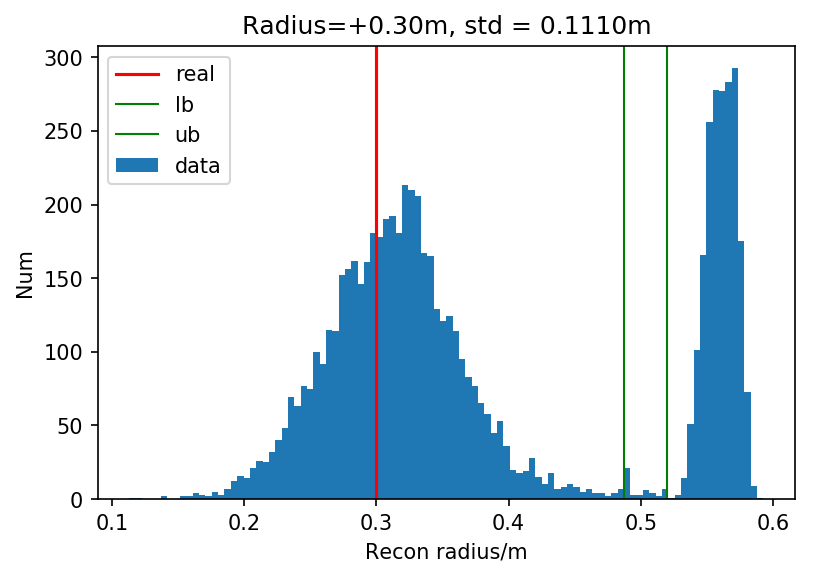

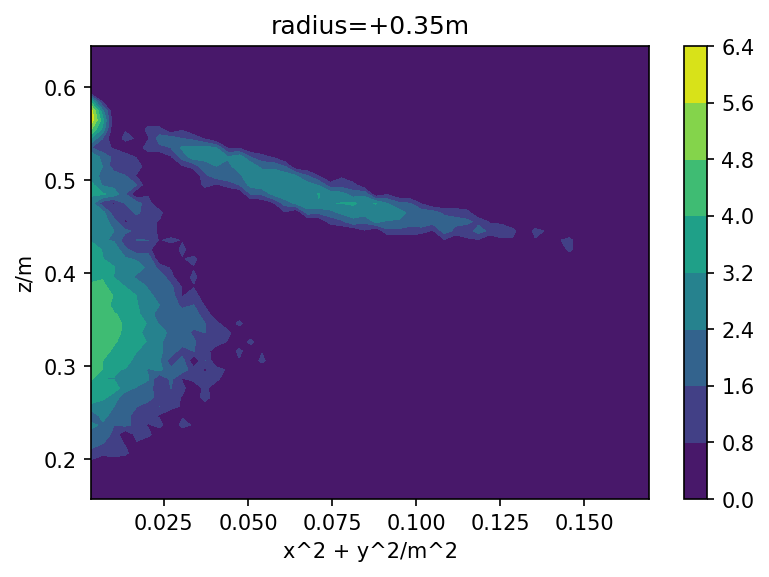

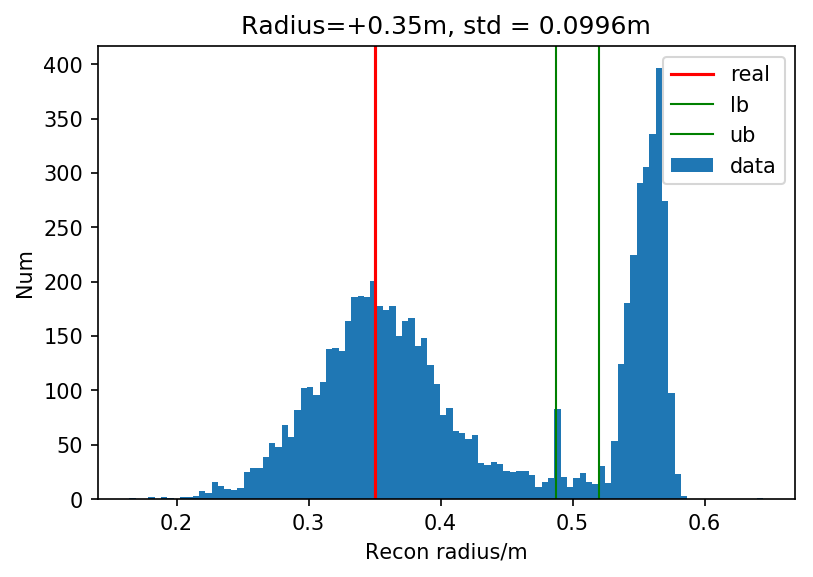

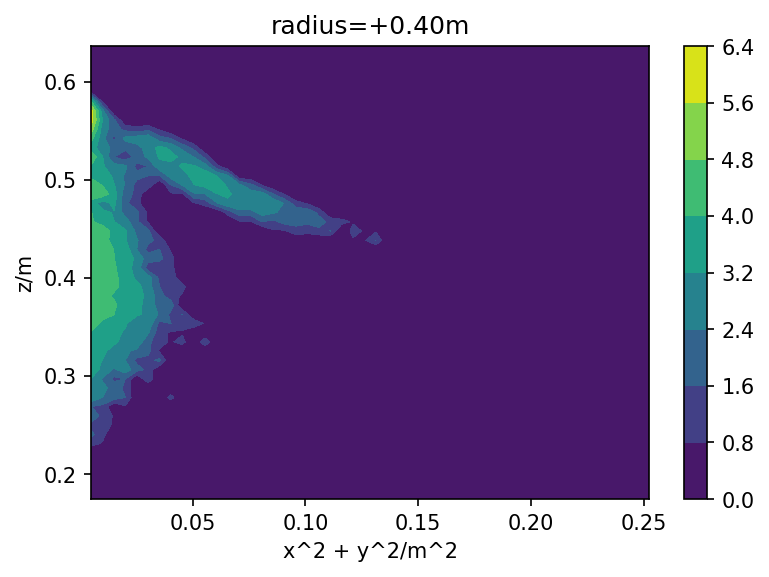

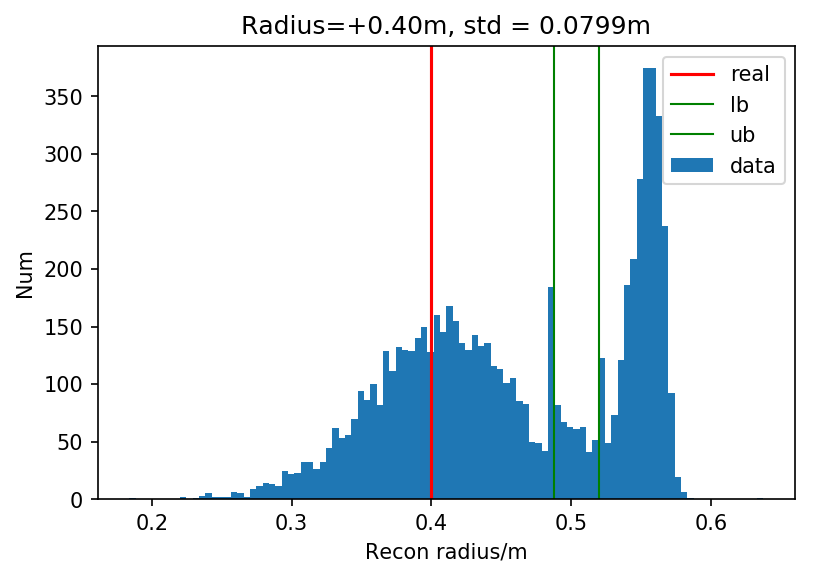

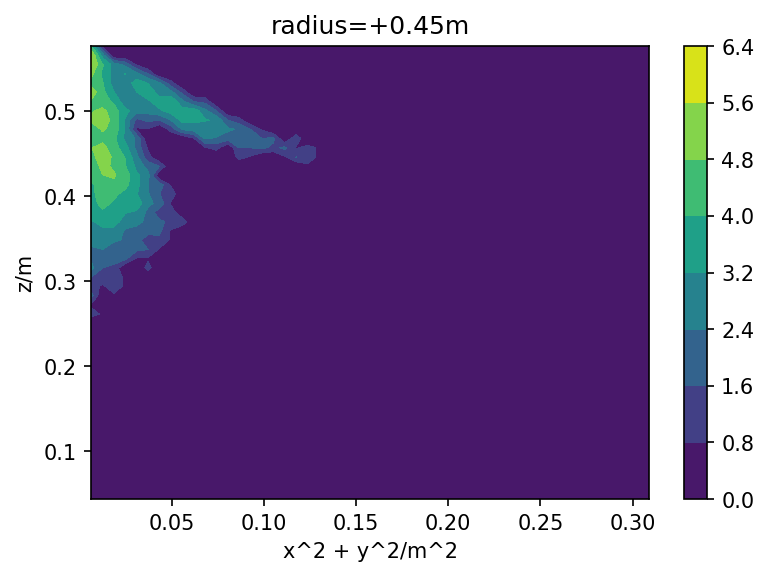

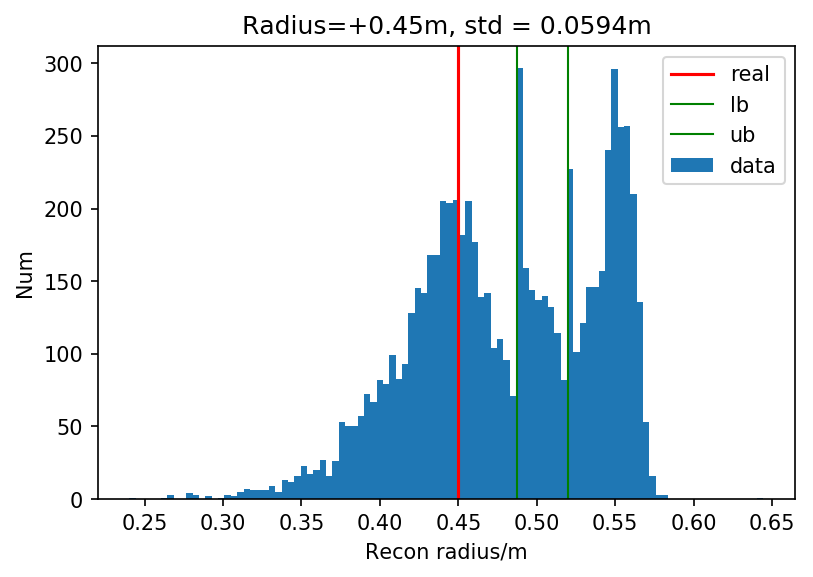

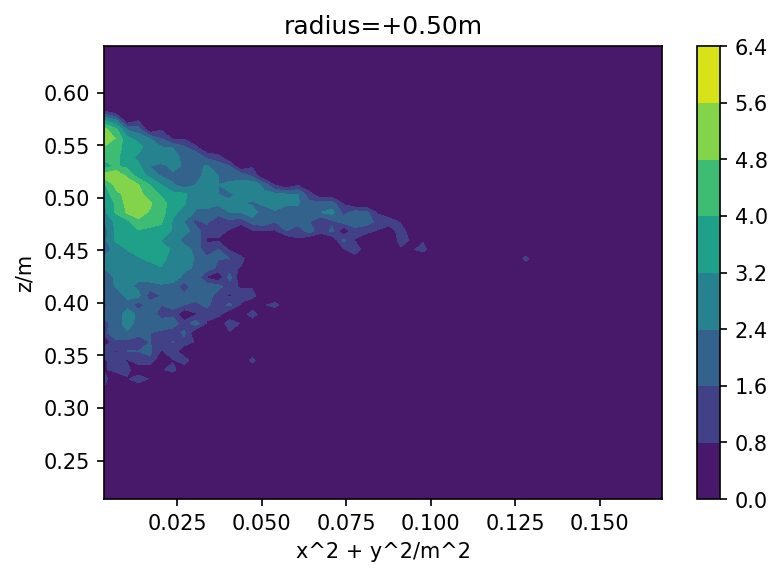

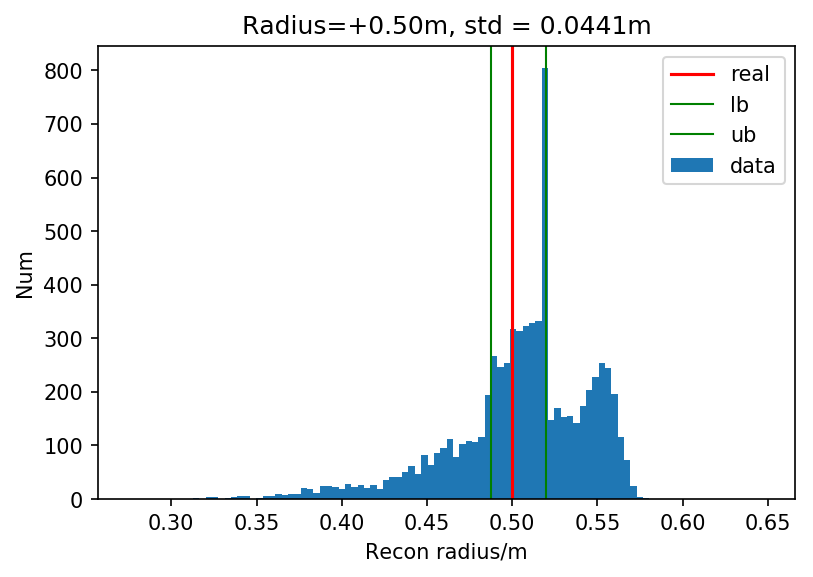

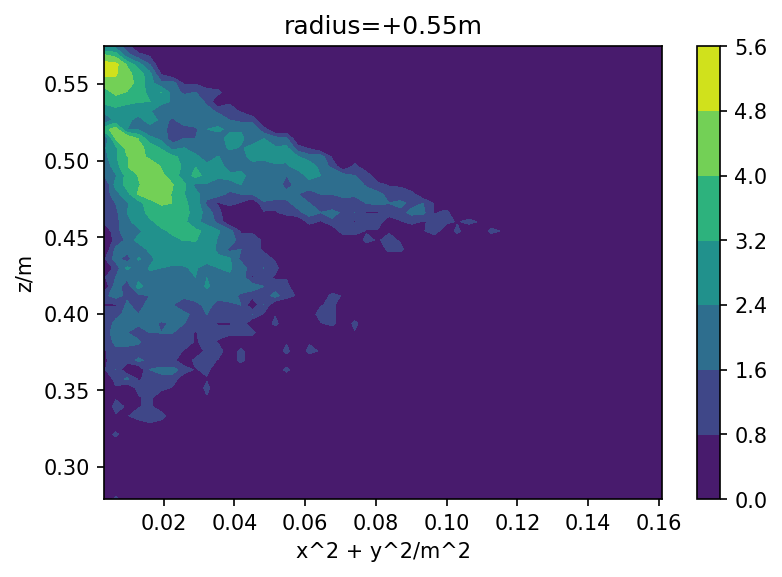

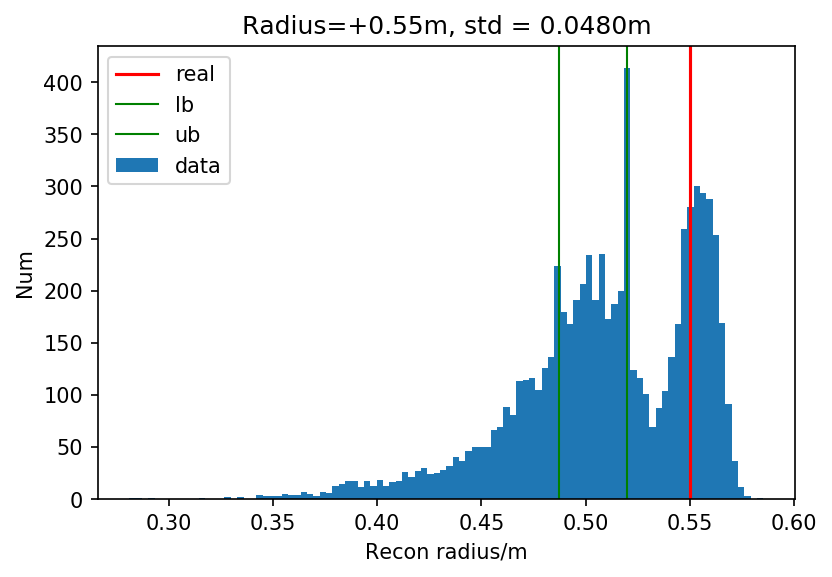

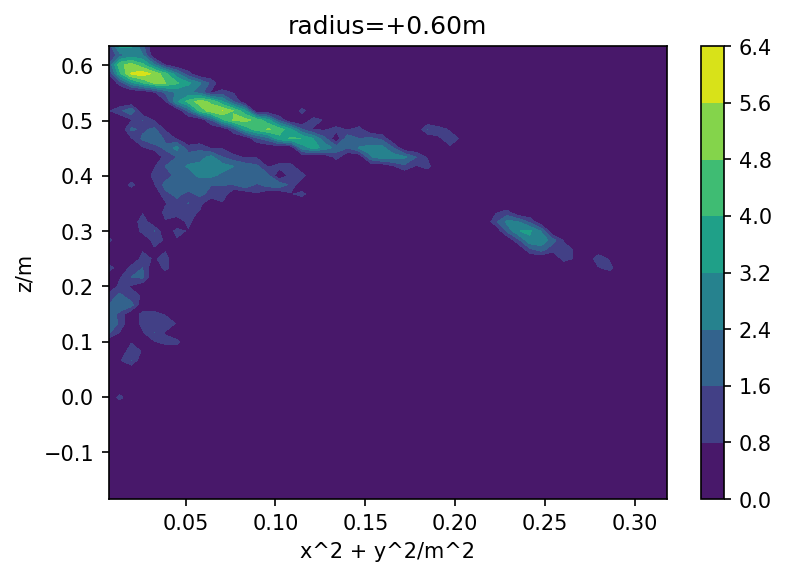

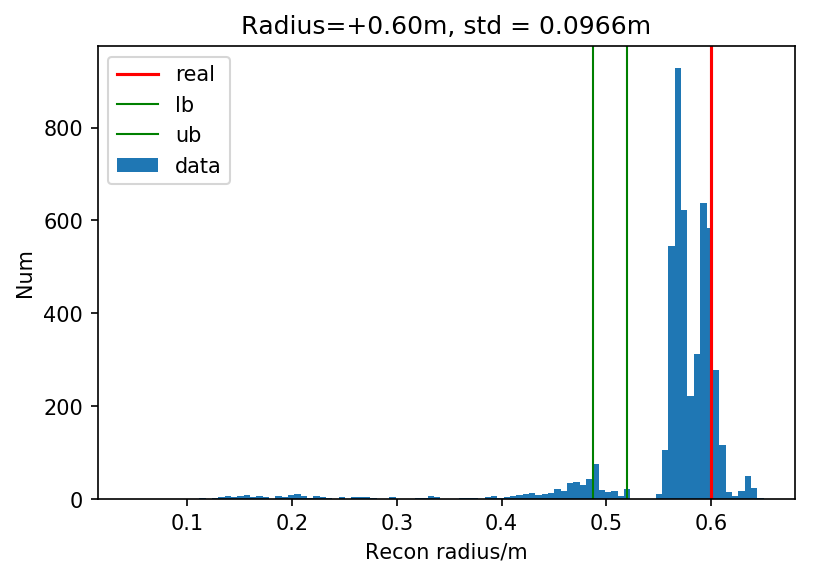

In [124]:
# example of read 1 file
for i,file in enumerate(np.arange(0,0.65,0.05)):

    h = tables.open_file('../result_1t_2.0MeV/1t_%+.2f.h5' % file,'r')
    recondata = h.root.Recon
    E1 = recondata[:]['E_sph_in']
    x1 = recondata[:]['x_sph_in']
    y1 = recondata[:]['y_sph_in']
    z1 = recondata[:]['z_sph_in']
    L1 = recondata[:]['Likelihood_in']

    E2 = recondata[:]['E_sph_out']
    x2 = recondata[:]['x_sph_out']
    y2 = recondata[:]['y_sph_out']
    z2 = recondata[:]['z_sph_out']
    L2 = recondata[:]['Likelihood_out']

    data = np.zeros((np.size(x1),3))
    index = L1 < L2
    data[index,0] = x1[index]
    data[index,1] = y1[index]
    data[index,2] = z1[index]

    data[~index,0] = x2[~index]
    data[~index,1] = y2[~index]
    data[~index,2] = z2[~index]

    xt = recondata[:]['x_truth']
    yt = recondata[:]['y_truth']
    zt = recondata[:]['z_truth']

    x = data[:,0]
    y = data[:,1]
    z = data[:,2]

    H1, xedges, yedges = np.histogram2d(x[~np.isnan(x)]**2 + y[~np.isnan(x)]**2, z[~np.isnan(z)], bins=50)
    X, Y = np.meshgrid(xedges[1:],yedges[1:])
    plt.figure(dpi=150)
    plt.contourf(X,Y,np.log(np.transpose(H1)+1))
    plt.colorbar()
    plt.xlabel('x^2 + y^2/m^2')
    plt.ylabel('z/m')
    plt.title('radius=%+.2fm' % file)
    plt.savefig('1MeV%d.png' % i)
    plt.show()
    
    #index1 = (~index) & (~np.isnan(x2))
    #plt.hist(np.nan_to_num(np.sqrt(data[index1,0]**2 + data[index1,1]**2 + data[index1,2]**2)),bins=100)
    #plt.show()
    plt.figure(dpi=150)
    index2 = ~np.isnan(x)
    plt.hist(np.sqrt(x[index2]**2+y[index2]**2+z[index2]**2), bins=100)
    plt.axvline(file, color='red')
    plt.axvline(0.80 * 0.65,color='green',linewidth=1)
    plt.axvline(0.75 * 0.65,color='green',linewidth=1)
    plt.xlabel('Recon radius/m')
    plt.ylabel('Num')
    plt.legend(['real','lb','ub','data'])
    plt.title('Radius=%+.2fm, std = %.4fm' % (file, np.std(z[index2]-zt[index2])))
    plt.savefig('1MeV%da.png' % i)
    plt.show()

In [75]:
def readfile(path):
    #path = r'../result_1t_1MeV_new'
    filenames=os.listdir(path)
    radius = np.arange(0.651,-0.65,-0.01)
    data = []

    E_total = []
    x_total = []
    y_total = []
    z_total = []
    E_truth = []
    x_truth = []
    y_truth = []
    z_truth = []
    for index,i in enumerate(radius):
        filenames = os.listdir(path)
        for j in filenames:
            #print('%+.2f' % i)
            if ('%+.2f' % i) in j:
                #print(os.path.join(path, j))
                h = tables.open_file(os.path.join(path, j),'r')
                recondata = h.root.Recon
                E1 = recondata[:]['E_sph_in']
                x1 = recondata[:]['x_sph_in']
                y1 = recondata[:]['y_sph_in']
                z1 = recondata[:]['z_sph_in']
                L1 = recondata[:]['Likelihood_in']

                E2 = recondata[:]['E_sph_out']
                x2 = recondata[:]['x_sph_out']
                y2 = recondata[:]['y_sph_out']
                z2 = recondata[:]['z_sph_out']
                L2 = recondata[:]['Likelihood_out']

                data = np.zeros((np.size(x1),4))
                index = L1 < L2
                data[index,0] = x1[index]
                data[index,1] = y1[index]
                data[index,2] = z1[index]
                data[index,3] = E1[index]

                data[~index,0] = x2[~index]
                data[~index,1] = y2[~index]
                data[~index,2] = z2[~index]
                data[~index,3] = E2[~index]
                
                x = data[:,0]
                y = data[:,1]
                z = data[:,2]
                E = data[:,3]
                '''
                xt = recondata[:]['x_truth']
                yt = recondata[:]['y_truth']
                zt = recondata[:]['z_truth']
                '''
                
                xt = np.zeros_like(x1)
                yt = np.zeros_like(x1) + i/5
                zt = np.zeros_like(x1) + i
                
                E_total = np.hstack((E_total, E))
                x_total = np.hstack((x_total, x))
                y_total = np.hstack((y_total, y))
                z_total = np.hstack((z_total, z))
                x_truth = np.hstack((x_truth, xt))
                y_truth = np.hstack((y_truth, yt))
                z_truth = np.hstack((z_truth, zt))
                
                h.close()
    return (E_total,x_total,y_total,z_total,x_truth,y_truth,z_truth)

In [129]:
A = readfile('../result_1t_2.0MeV')
index1 = ~np.isnan(A[1])
radius = np.arange(+0.6501,-0.65, -0.01)
record_xm = np.zeros_like(radius)
record_ym = np.zeros_like(radius)
record_zm = np.zeros_like(radius)
record_xs = np.zeros_like(radius)
record_ys = np.zeros_like(radius)
record_zs = np.zeros_like(radius)
for ra_index,ra in enumerate(radius):
    index2 = np.abs(A[-1] - ra)<0.005
    record_xm[ra_index] = np.mean(np.abs(A[1][index1 & index2] - A[4][index1 & index2]))
    record_ym[ra_index] = np.mean(np.abs(A[2][index1 & index2] - A[5][index1 & index2]))
    record_zm[ra_index] = np.mean(np.abs(A[3][index1 & index2] - A[6][index1 & index2]))
    record_xs[ra_index] = np.std(np.abs(A[1][index1 & index2] - A[4][index1 & index2]))
    record_ys[ra_index] = np.std(np.abs(A[2][index1 & index2] - A[5][index1 & index2]))
    record_zs[ra_index] = np.std(np.abs(A[3][index1 & index2] - A[6][index1 & index2]))

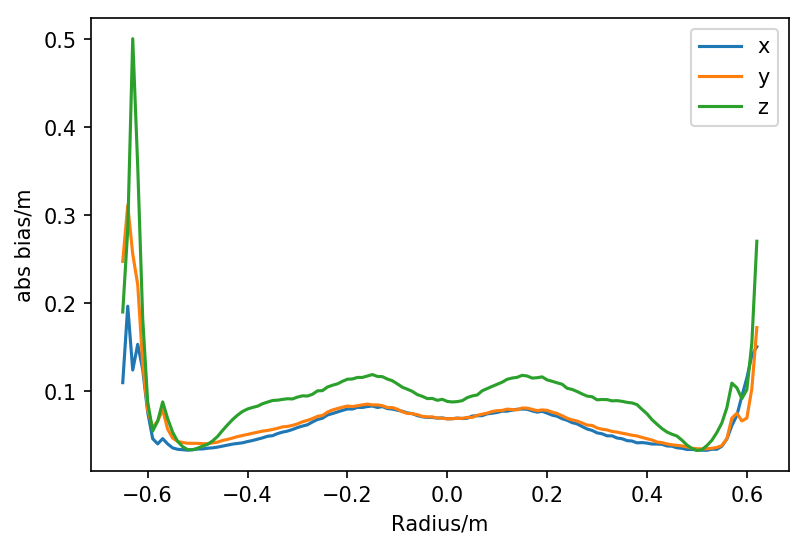

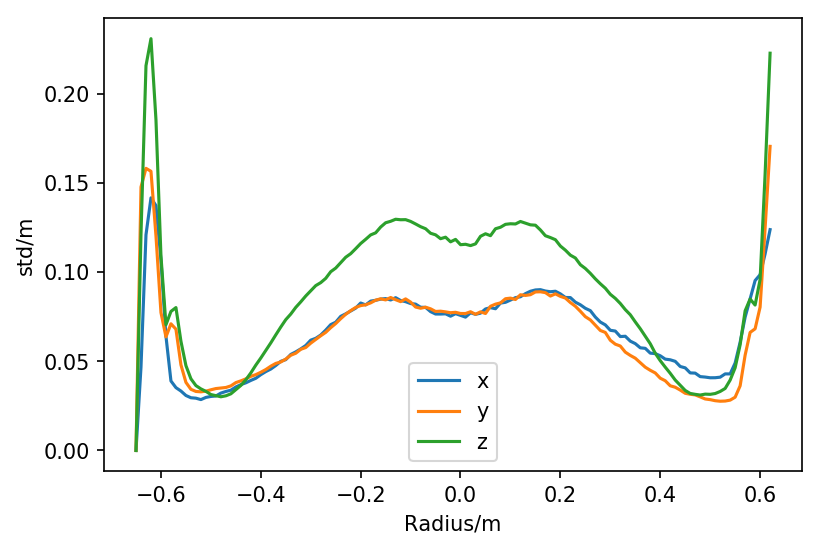

In [130]:
plt.figure(num=1, dpi=150)
plt.plot(radius,record_xm)
plt.plot(radius,record_ym)
plt.plot(radius,record_zm)
plt.xlabel('Radius/m')
plt.ylabel('abs bias/m')
plt.legend(['x','y','z'])
plt.figure(num=2, dpi=150)
plt.plot(radius,record_xs)
plt.plot(radius,record_ys)
plt.plot(radius,record_zs)
plt.xlabel('Radius/m')
plt.ylabel('std/m')
plt.legend(['x','y','z'])

In [132]:
A = readfile('../result_1t_2.0MeV')
index1 = ~np.isnan(A[1])
r = A[1]**2 + A[2]**2 + A[3]**2
index2 = r < 0.55**2
radius = np.arange(+0.6501,-0.65, -0.01)
record_xm = np.zeros_like(radius)
record_ym = np.zeros_like(radius)
record_zm = np.zeros_like(radius)
record_xs = np.zeros_like(radius)
record_ys = np.zeros_like(radius)
record_zs = np.zeros_like(radius)
for ra_index,ra in enumerate(radius):
    index3 = np.abs(A[-1] - ra)<0.005
    record_xm[ra_index] = np.mean(np.abs(A[1][index1 & index2 & index3] - A[4][index1 & index2 & index3]))
    record_ym[ra_index] = np.mean(np.abs(A[2][index1 & index2 & index3] - A[5][index1 & index2 & index3]))
    record_zm[ra_index] = np.mean(np.abs(A[3][index1 & index2 & index3] - A[6][index1 & index2 & index3]))
    record_xs[ra_index] = np.std(np.abs(A[1][index1 & index2 & index3] - A[4][index1 & index2 & index3]))
    record_ys[ra_index] = np.std(np.abs(A[2][index1 & index2 & index3] - A[5][index1 & index2 & index3]))
    record_zs[ra_index] = np.std(np.abs(A[3][index1 & index2 & index3] - A[6][index1 & index2 & index3]))

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


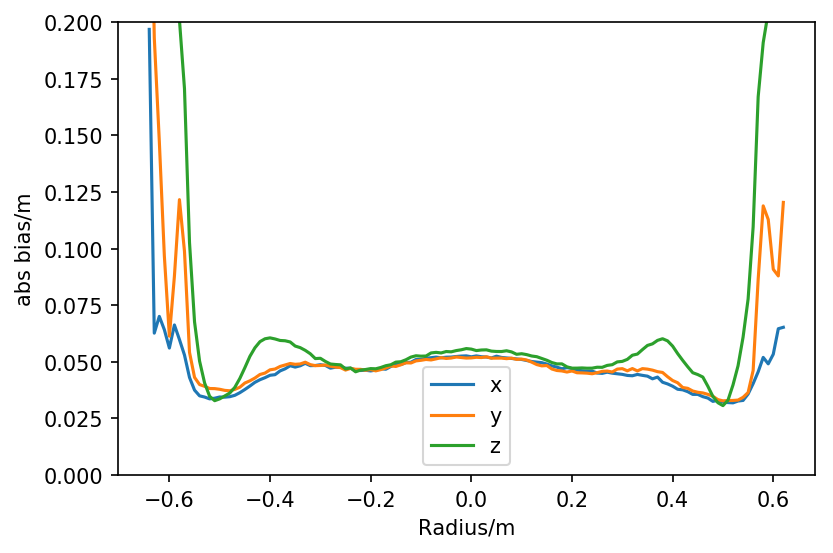

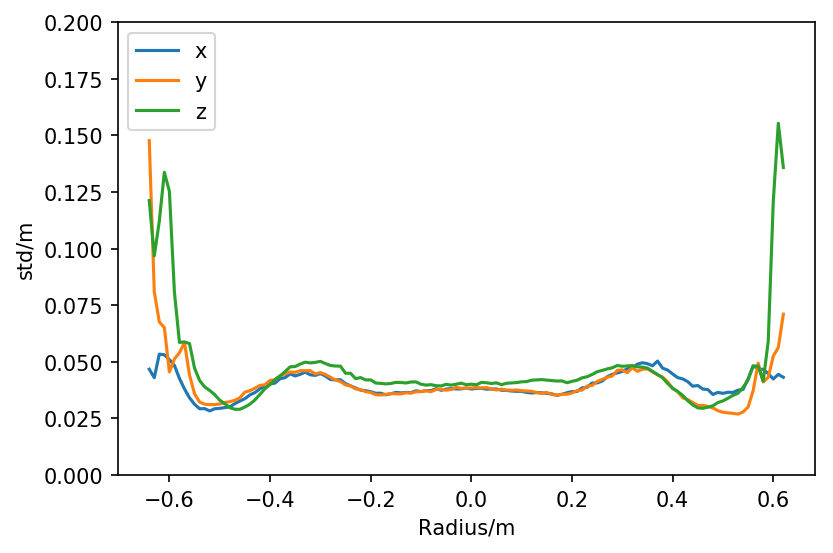

In [134]:
plt.figure(num=1, dpi=150)
plt.plot(radius,record_xm)
plt.plot(radius,record_ym)
plt.plot(radius,record_zm)
plt.legend(['x','y','z'])
plt.ylim([0,0.2])
plt.xlabel('Radius/m')
plt.ylabel('abs bias/m')
plt.figure(num=2, dpi=150)
plt.plot(radius,record_xs)
plt.plot(radius,record_ys)
plt.plot(radius,record_zs)
plt.legend(['x','y','z'])
plt.ylim([0,0.2])
plt.xlabel('Radius/m')
plt.ylabel('std/m')
plt.show()

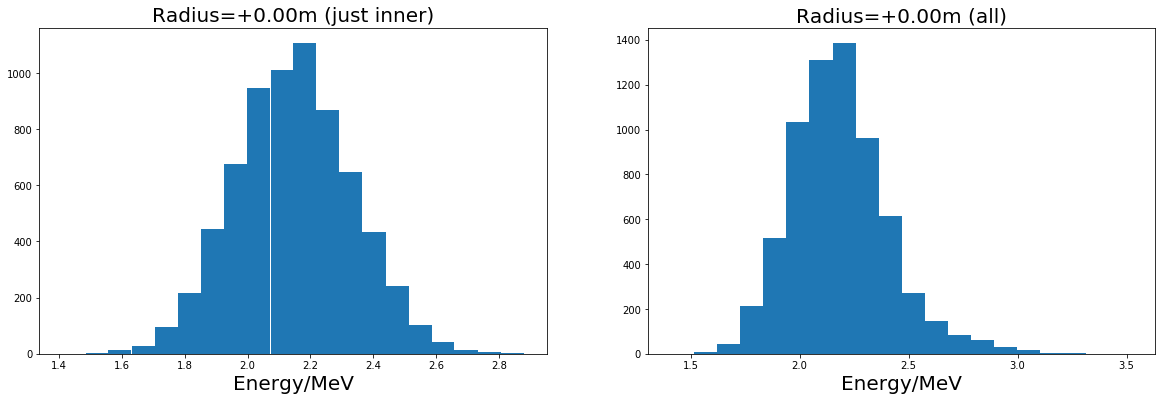

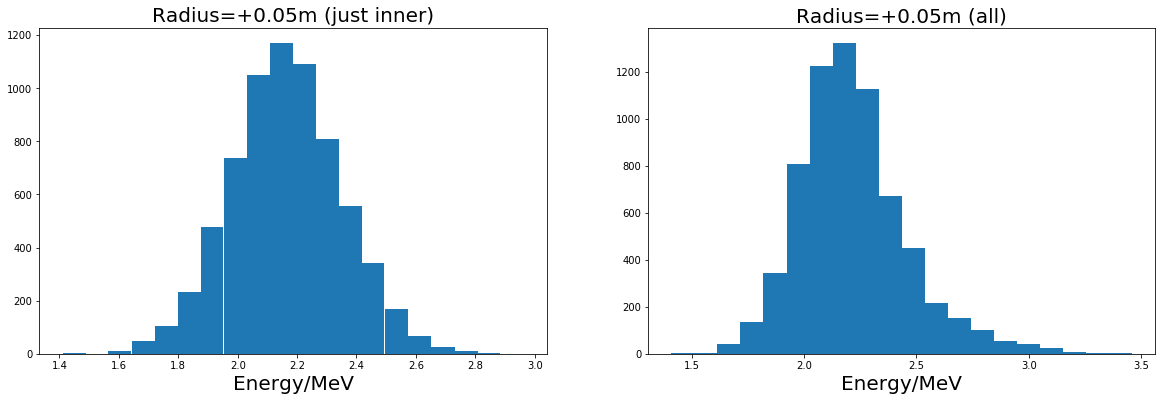

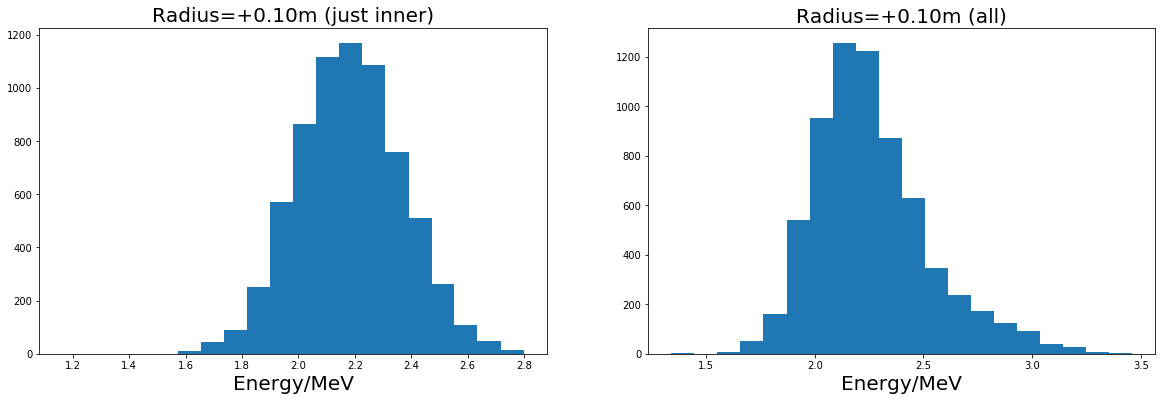

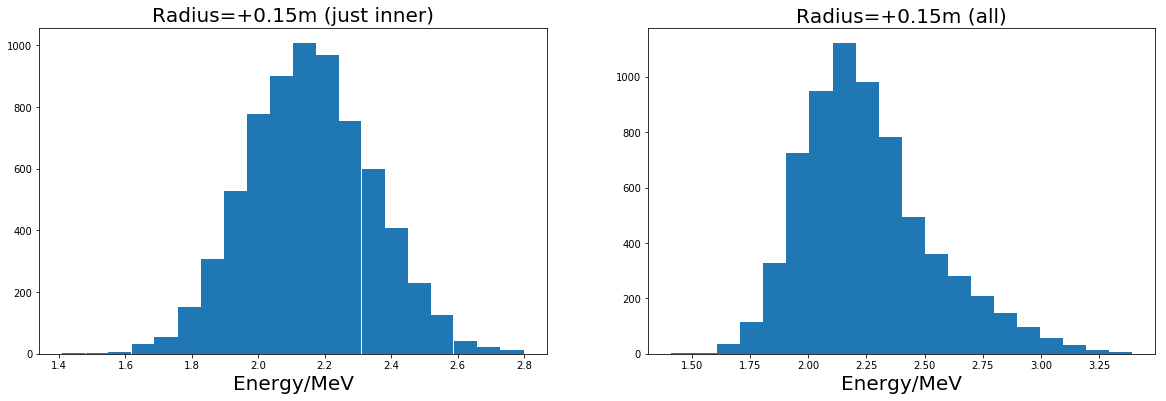

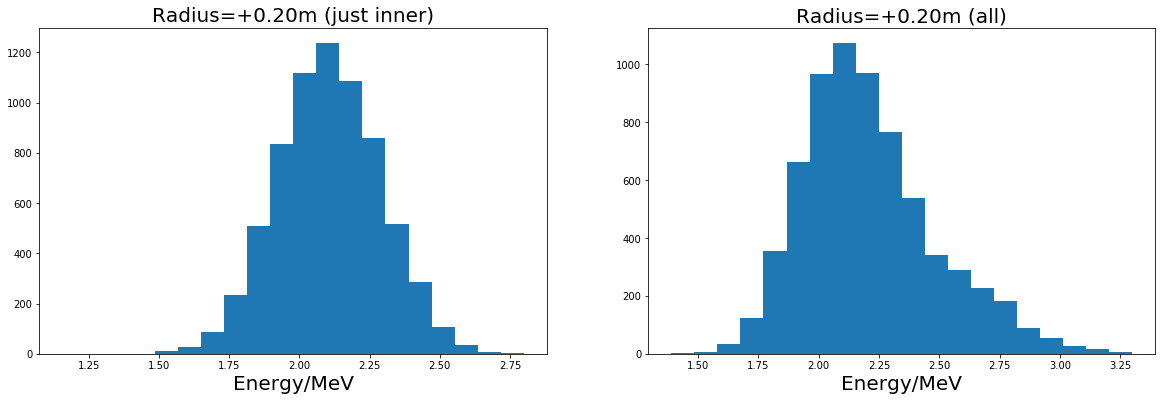

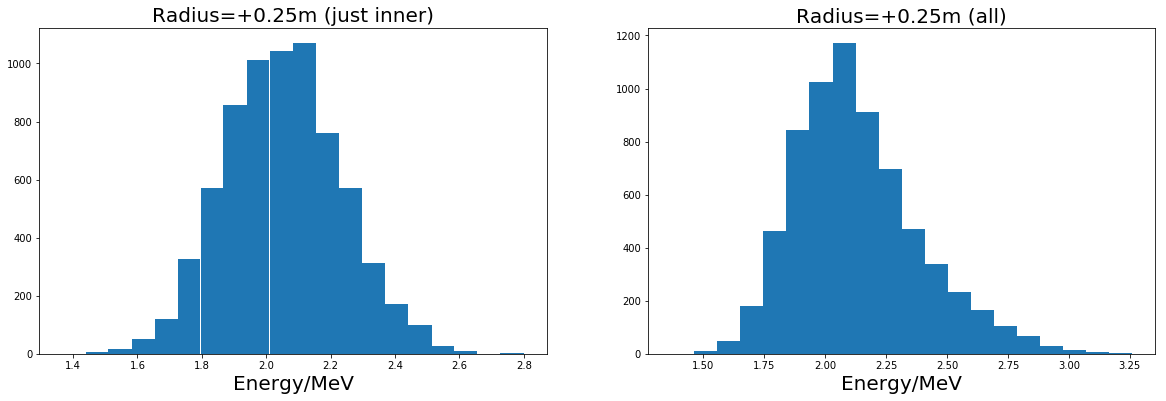

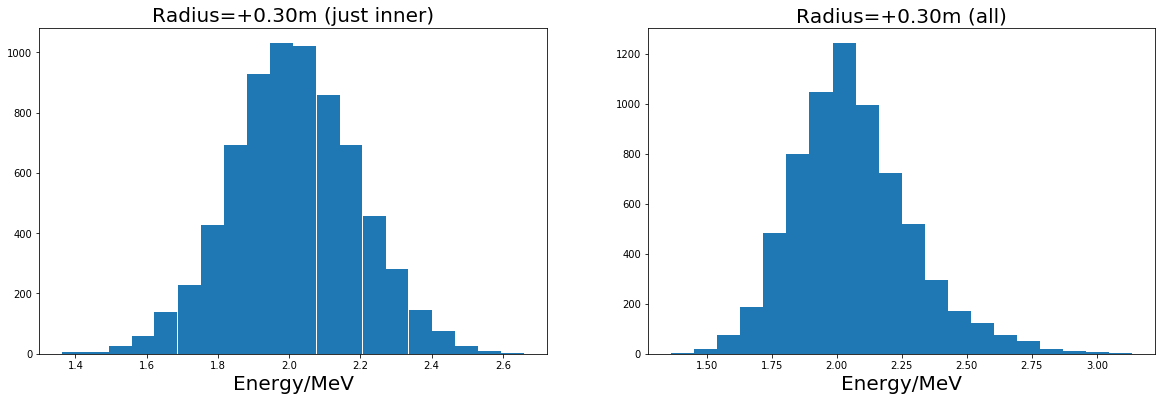

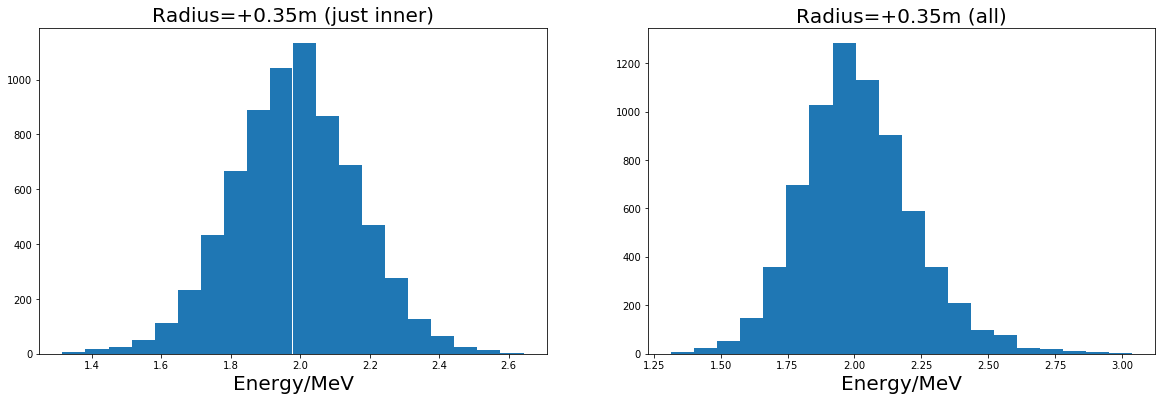

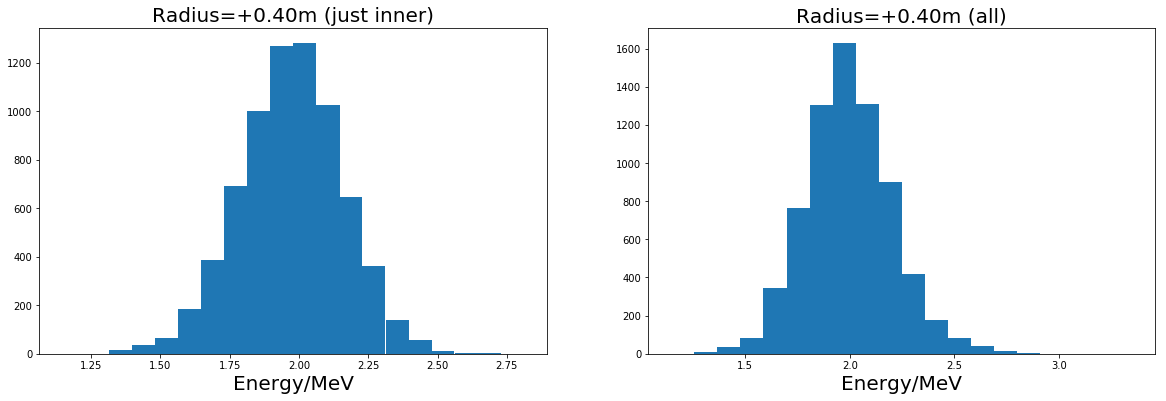

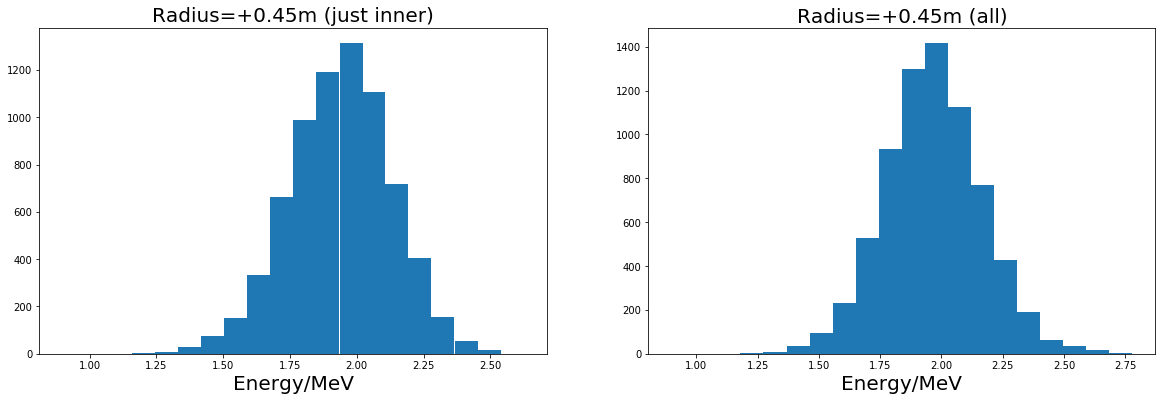

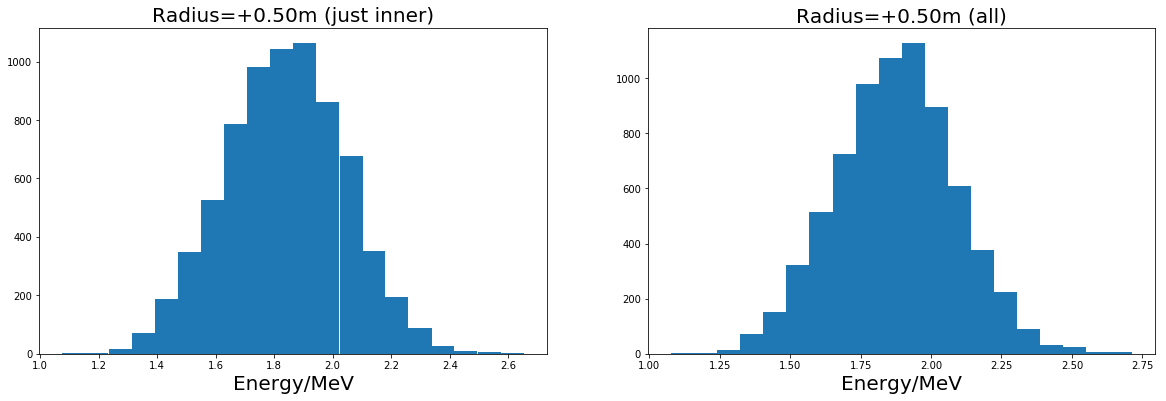

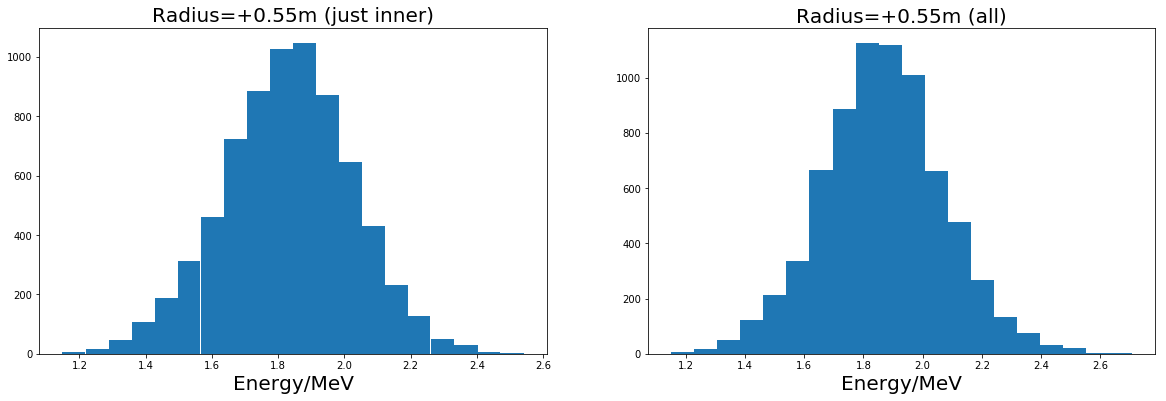

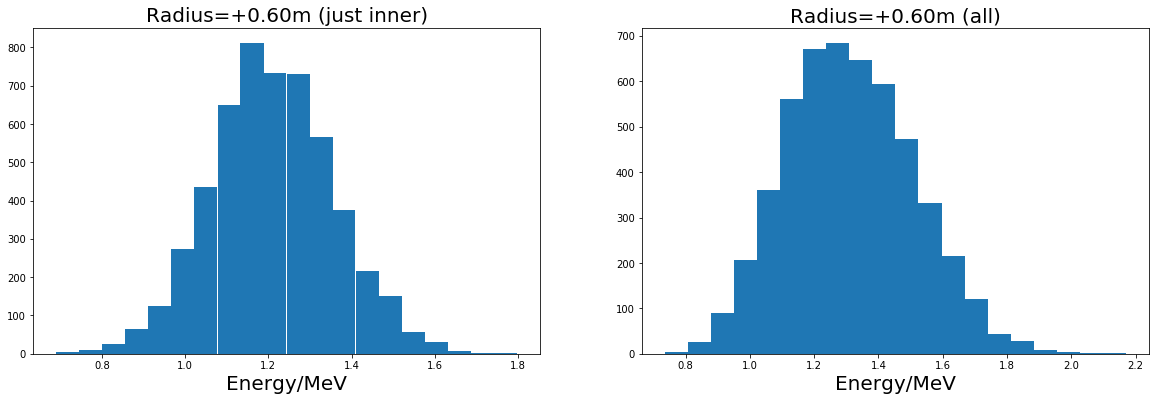

In [165]:
# example of spectrum
def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8 
for i, file in enumerate(np.arange(0,0.65,0.05)):
    h = tables.open_file('../result_1t_2.0MeV/1t_%+.2f.h5' % file,'r')
    recondata = h.root.Recon
    E1 = recondata[:]['E_sph_in']
    x1 = recondata[:]['x_sph_in']
    y1 = recondata[:]['y_sph_in']
    z1 = recondata[:]['z_sph_in']
    L1 = recondata[:]['Likelihood_in']

    E2 = recondata[:]['E_sph_out']
    x2 = recondata[:]['x_sph_out']
    y2 = recondata[:]['y_sph_out']
    z2 = recondata[:]['z_sph_out']
    L2 = recondata[:]['Likelihood_out']

    data = np.zeros((np.size(x1),4))
    index = L1 < L2
    data[index,0] = x1[index]
    data[index,1] = y1[index]
    data[index,2] = z1[index]
    data[index,3] = E1[index]
    
    data[~index,0] = x2[~index]
    data[~index,1] = y2[~index]
    data[~index,2] = z2[~index]
    data[~index,3] = E2[~index]
    
    xt = recondata[:]['x_truth']
    yt = recondata[:]['y_truth']
    zt = recondata[:]['z_truth']

    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    E = data[:,3]
    
    h1 = tables.open_file('../../calib/PE_coeff_1t10.h5','r')
    px = h1.root.poly_in[:]
    h1.close()
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1,2,1)
    r1 = np.sqrt(x1**2 + y1**2 + z1**2)
    E_real = np.exp(E1 - even_func(r1, *px[0]) + np.log(2))
    plt.hist(E_real[~np.isnan(E_real)],bins=20)
    plt.title('Radius=%+.2fm (just inner)' % file, fontsize=20)
    plt.xlabel('Energy/MeV', fontsize=20)
    
    plt.subplot(1,2,2)
    r = np.sqrt(x**2 + y**2 + z**2)
    E_real = np.exp(E - even_func(r, *px[0]) + np.log(2))
    plt.hist(E_real[~np.isnan(E_real)],bins=20)
    plt.title('Radius=%+.2fm (all)' % file, fontsize=20)
    plt.xlabel('Energy/MeV', fontsize=20)   
    plt.show()

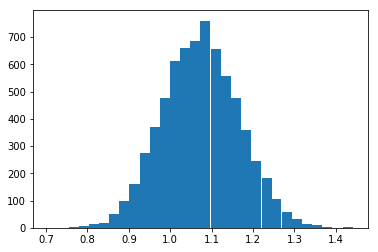